# 버스 사용량 수요 시계열 분석

## 패키지/그래프 초기화

In [1]:
from pandas import read_excel,  to_datetime, DateOffset, concat
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys
from helper import set_datetime_index

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

## 데이터 준비

In [3]:
df = read_excel("111_지역별승하차.xls")
df.head()

,일자,행정구역,승차,하차,환승
0,2020년01월01일,가람동,38,43,5
1,2020년01월01일,고운동,997,900,110
2,2020년01월01일,금남면,490,480,28
3,2020년01월01일,나성동,892,765,119
4,2020년01월01일,다정동,175,251,19


In [4]:
df1 = df.copy()

In [5]:
df1 = df.query("행정구역 == '합계'")
df1.head()

,일자,행정구역,승차,하차,환승
22,2020년01월01일,합계,16533,14347,2600
46,2020년01월02일,합계,36164,31159,5652
70,2020년01월03일,합계,38389,32163,6002
94,2020년01월04일,합계,24847,20774,3928
117,2020년01월05일,합계,19212,16882,2970


In [6]:
df1['일자'] = to_datetime(df1['일자'], format="%Y년%m월%d일")
df1

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21332\539741218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['일자'] = to_datetime(df1['일자'], format="%Y년%m월%d일")


,일자,행정구역,승차,하차,환승
22,2020-01-01,합계,16533,14347,2600
46,2020-01-02,합계,36164,31159,5652
70,2020-01-03,합계,38389,32163,6002
94,2020-01-04,합계,24847,20774,3928
117,2020-01-05,합계,19212,16882,2970
...,...,...,...,...,...
32973,2023-10-27,합계,42371,36266,6903
32997,2023-10-28,합계,28201,24117,4373
33020,2023-10-29,합계,22385,19654,3588
33043,2023-10-30,합계,38297,33367,6232


## 데이터 타입 변경

In [7]:
df1 = set_datetime_index(df1,'일자')
df1.tail()

,행정구역,승차,하차,환승
2023-10-27,합계,42371,36266,6903
2023-10-28,합계,28201,24117,4373
2023-10-29,합계,22385,19654,3588
2023-10-30,합계,38297,33367,6232
2023-10-31,합계,38465,33528,6197


In [8]:
# exp_time_data(data=df1, yname="승차", sd_model='m', max_diff=10)

> seasonal_order=(1,1,0,24)가 적절

In [9]:
model = ARIMA(df1['승차'], order= (1,1,0), seasonal_order=(1,1,0,24))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                               승차   No. Observations:                 1400
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 24)   Log Likelihood              -14765.682
Date:                          Wed, 08 Nov 2023   AIC                          29537.364
Time:                                  15:30:13   BIC                          29553.043
Sample:                              01-01-2020   HQIC                         29543.231
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1925      0.034     -5.646      0.000      -0.259      -0.126
ar.S.L24      -0.5787      0.030    -19.044      0.

In [10]:
fv = fit.fittedvalues
fv.head()

2020-01-01        0.000000
2020-01-02    13376.027811
2020-01-03    32403.807423
2020-01-04    37965.480195
2020-01-05    27442.918794
Freq: D, dtype: float64

In [11]:
fc = fit.forecast(730)
fc.head()

2023-11-01    34385.350429
2023-11-02    37454.615893
2023-11-03    32805.373592
2023-11-04    30681.567809
2023-11-05    40817.798577
Freq: D, Name: predicted_mean, dtype: float64

In [12]:
# # 주석 지우지 말 것. 지울 거라면 아래 그래프 셀 동작 후 지울 것
# # 데이터 프레임을 2달 간격으로 리샘플링
# df1_resampled = df1.resample('2M').sum()
# df1_resampled.head()

In [13]:
# fc_resampled

In [14]:
# df1_resampled.head()

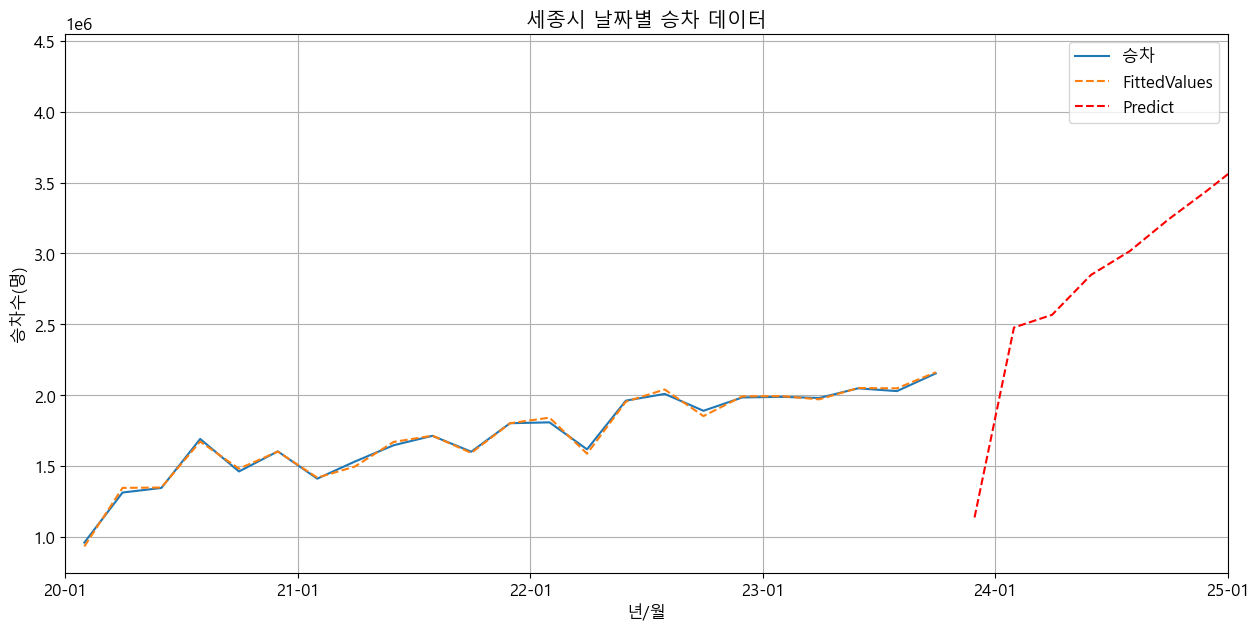

In [15]:
plt.figure(figsize=(15, 7))

# 데이터 프레임을 2달 간격으로 리샘플링
df1_resampled = df1.resample('2M').sum()
df1_resampled = df1_resampled.iloc[:-1]

# 원본 데이터 (2023-10까지만 표현)
sb.lineplot(data=df1_resampled, x=df1_resampled.index, y='승차', label='승차')

# "FittedValues" 및 "Predict" 데이터를 2달 단위로 리샘플링
fv_resampled = fv.resample('2M').sum()
fv_resampled = fv_resampled.iloc[:-1]
# 원본에 대한 학습결과 (2달 단위로 표현)
sb.lineplot(x=fv_resampled.index, y=fv_resampled.values, label='FittedValues', linestyle='--')

fc_resampled = fc.resample('2M').sum()

# 향후 1년간의 예측값 (2달 단위로 표현)
sb.lineplot(x=fc_resampled.index, y=fc_resampled.values, label='Predict', linestyle='--', color='red')

plt.title("세종시 날짜별 승차 데이터")
plt.xlabel('년/월')
xStart = to_datetime('2020-01')
xEnd = to_datetime('2025-01')
plt.xlim(xStart, xEnd)
plt.ylabel('승차수(명)')
plt.ylim(0.75*1e6, )
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)
plt.grid()
plt.show()
plt.close()